In [1]:
import tensorflow as tf

In [2]:
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.04555881], shape=(1,), dtype=float32)


In [3]:
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.25474355  0.23595987 -1.6676071  -0.28280127], shape=(4,), dtype=float32)


# **AND 퍼셉트론**

In [4]:
import math
def sigmoid(x):
    return 1/ (1 + math.exp(-x))

In [7]:
import numpy as np
x = np.array( [ [1,1], [1,0], [0,1], [0,0] ])
y = np.array( [ [1], [0], [0], [0] ])
w = tf.random.normal([2], 0,1)
b = tf.random.normal([1], 0,1)
b_x=1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid( np.sum(x[j]*w) + b_x* b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum +=error

    if i % 200 ==199:
        print(i, error_sum)



199 -0.10404174177846394
399 -0.06343904160982969
599 -0.045505395594922685
799 -0.035377681060729034
999 -0.02888632245891247
1199 -0.0243808171087692
1399 -0.021075829686868528
1599 -0.0185502250006119
1799 -0.016559708145597506
1999 -0.014949812179570305


# 파이썬에서 리스트에 실수 곱하기

In [ ]:
import numpy as np
print ( np.array([1,2,3])*2)
print ( np.array([1,2,3] *0))
print ( np.array([1,2,3]) *0)

[2 4 6]
[]
[0 0 0]


**AND 네트워크의 평가**

In [8]:
for i in range(4):
    print( 'X', x[i], 'Y', y[i], 'Output:', sigmoid( np.sum( x[i] *w ) +b ))

X [1 1] Y [1] Output: 0.9650988814535489
X [1 0] Y [0] Output: 0.024733723442124437
X [0 1] Y [0] Output: 0.024808852098966376
X [0 0] Y [0] Output: 2.333139002492716e-05


# **OR 네트워크**

In [9]:
import numpy as np
x = np.array( [ [1,1], [1,0], [0,1], [0,0] ])
y = np.array( [ [1], [1], [1], [0] ])
w = tf.random.normal([2], 0,1)
b = tf.random.normal([1], 0,1)
b_x=1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid( np.sum(x[j]*w) + b_x* b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum +=error

    if i % 200 ==199:
        print(i, error_sum)


199 -0.04482803833117391
399 -0.0244112561488148
599 -0.016703979532261812
799 -0.012657739957341992
999 -0.01017297367184472
1199 -0.008495394836747341
1399 -0.007288406961247398
1599 -0.006378769483345578
1799 -0.005670047784067021
1999 -0.005100648837582204


OR 네트워크의 평가

In [ ]:
for i in range(4):
    print( 'X', x[i], 'Y', y[i], 'Output:', sigmoid( np.sum( x[i] *w ) +b ))

X [1 1] Y [1] Output: 0.9999971225936205
X [1 0] Y [1] Output: 0.98968594325836
X [0 1] Y [1] Output: 0.9896732510932151
X [0 0] Y [0] Output: 0.02577840218439818


# **XOR 네트워크**

In [ ]:
import numpy as np
x = np.array( [ [1,1], [1,0], [0,1], [0,0] ])
y = np.array( [ [0], [1], [1], [0] ])
w = tf.random.normal([2], 0.1)
b = tf.random.normal([1], 0,1)
b_x=1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid( np.sum(x[j]*w) + b_x* b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum +=error

    if i % 200 ==199:
        print(i, error_sum)

199 0.004788097351889009
399 0.00019462795843228076
599 7.902674935000853e-06
799 3.248179979431498e-07
999 2.792131748030613e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [ ]:
for i in range(4):
    print( 'X', x[i], 'Y', y[i], 'Output:', sigmoid( np.sum( x[i] *w ) +b ))

X [1 1] Y [0] Output: 0.5128176323940516
X [1 0] Y [1] Output: 0.5128176314633411
X [0 1] Y [1] Output: 0.4999999990686774
X [0 0] Y [0] Output: 0.49999999813735485


In [ ]:
print( 'w:', w)
print( 'b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


**keras를 이용하여 XOR문제 극복하기**

In [ ]:
import numpy as np
x = np.array( [ [1,1], [1,0], [0,1], [0,0] ])
y = np.array( [ [0], [1], [1], [0] ])

model = tf.keras.Sequential( [
                              tf.keras.layers.Dense (units=2, activation= 'sigmoid', input_shape= (2,)),
                              tf.keras.layers.Dense (units=1, activation= 'sigmoid')
                              ])

model.compile( optimizer = tf.keras.optimizers.SGD (lr=0.3), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit (x, y, epochs=2000, batch_size= 1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2904
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2846
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2803
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2756
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2758
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2747
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2744
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2728
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2729
Epoch 11/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2738
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2733
Epoch 13/2000
4/4 [==============================

In [ ]:
model.predict(x)

array([[0.04385677],
       [0.9420521 ],
       [0.9557704 ],
       [0.04920778]], dtype=float32)

In [ ]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.754092 , -5.643744 ],
       [ 5.0736423,  5.8106246]], dtype=float32)>
<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.315085 , -3.3279254], dtype=float32)>
<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.241136 ],
       [ 7.5208564]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([3.3686357], dtype=float32)>


# **시각화 기초 Graph**

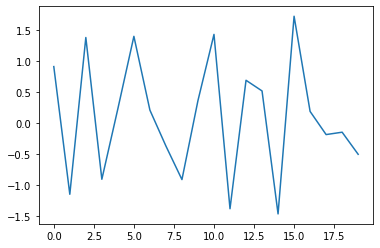

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal ([20], 0, 1)
plt.plot (x, y)
plt.show ()

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal ([20], 0, 1)
plt.plot (x, y, 'bo')
plt.show ()

NameError: ignored

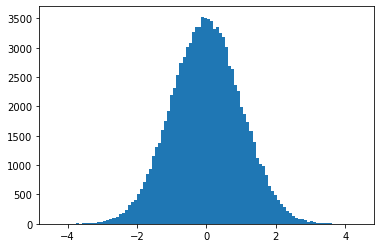

In [ ]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal ([100000], 0, 1)
plt.hist ( random_normal, bins = 100)
plt.show ()

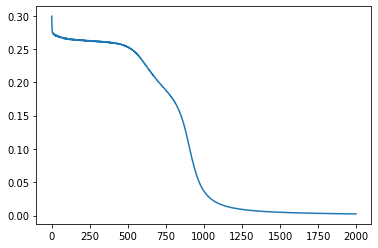

In [ ]:
import matplotlib.pyplot as plt
plt.plot ( history.history['loss'])